## Old version worked

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.adaptiveThreshold(blur,  255, 1, 1, 11, 2)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
c = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
                if area > max_area:
                    max_area = area
                    best_cnt = i
                    image = cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1

mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

out = np.zeros_like(gray)
out[mask == 255] = gray[mask == 255]
blur = cv2.GaussianBlur(out, (5,5), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

c = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 1000/2:
            cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1


cv2.imshow("Final Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'image' is not defined

## Morph transform, erode, dilate,...

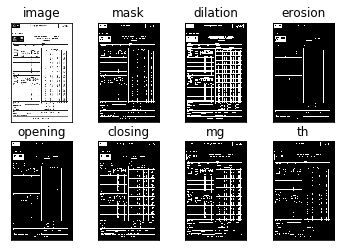

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_root = cv2.imread('Basketball4.jpg', cv2.IMREAD_GRAYSCALE)
image = image_root.copy()
_, mask =   cv2.threshold(image, 120,255, cv2.THRESH_BINARY_INV)
kernal = np.ones((2,2),np.uint8)
dilation = cv2.dilate(mask, kernal,iterations=2 )
erosion = cv2.erode(mask, kernal, iterations=1)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask,cv2.MORPH_TOPHAT, kernal)

titles = ['image','mask','dilation','erosion','opening','closing','mg','th']

images = [image, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])


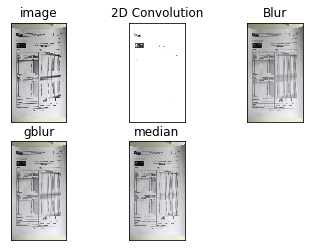

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_root = cv2.imread('Basketball1_new.jpg')
image2 = cv2.cvtColor(image_root, cv2.COLOR_BGR2RGB)
# homogeneous filter -- each output pixel is its mean of its kernel neighboors -- all pixel contribute with equal weight

kernel = np.ones ((2,2), np.float32)/4
dst = cv2.filter2D(image2, -1 , kernal)
blur = cv2.blur(image2, (5,5))
gblur = cv2.GaussianBlur(image2,(5,5),0)
median = cv2.medianBlur(image2,5)

titles = ['image', '2D Convolution', 'Blur', 'gblur', 'median']

images = [image2, dst, blur, gblur,median]

for i in range(5):
    plt.subplot(2,3,i+1), plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])



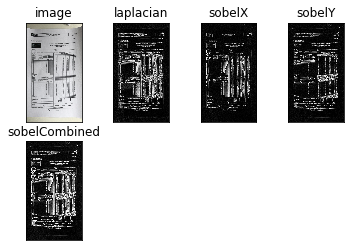

In [9]:
image_root = cv2.imread('Basketball1_new.jpg', cv2.IMREAD_GRAYSCALE)
image = image_root.copy()
lap = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(image, cv2.CV_64F,1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F,0,1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX, sobelY)
titles = ['image', 'laplacian','sobelX','sobelY','sobelCombined']

images = [image2, lap,sobelX,sobelY,sobelCombined]

for i in range(5):
    plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])



## Trackbar

In [10]:
image_root = cv2.imread('Basketball1_new.jpg', cv2.IMREAD_GRAYSCALE)
image = image_root.copy()
image=cv2.GaussianBlur(image,(5,5),0)

def funcCan(thresh1=0):
    thresh1 = cv2.getTrackbarPos('thresh1', 'canny')
    thresh2 = cv2.getTrackbarPos('thresh2', 'canny')
    edge = cv2.Canny(image, thresh1, thresh2)
    cv2.imshow('canny', edge)

win_name = "CannyTrackbars"
cv2.namedWindow(win_name)
cv2.resizeWindow(win_name, 500,100)

thresh1=100
thresh2=1
funcCan(0)
cv2.createTrackbar('thresh1','canny',thresh1,255,funcCan)
cv2.createTrackbar('thresh2','canny',thresh2,255,funcCan)
cv2.imshow('canny',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Find contours

In [21]:
image_root = cv2.imread('Basketball3.jpg')
image = image_root.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=cv2.GaussianBlur(image,(5,5),0)
edge = cv2.Canny(image, 120, 2400)

#ret, thresh = cv2.threshold(image,100,255,0)
thresh = cv2.adaptiveThreshold(edge,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours: " + str(len(contours)))
print(contours[3])

cv2.drawContours(image_root, contours,-1,(0,255,0),1)
cv2.imshow('Test',image_root)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours: 5561
[[[ 447 1190]]

 [[ 448 1189]]

 [[ 449 1189]]

 [[ 450 1190]]

 [[ 449 1191]]

 [[ 448 1191]]]


## HughLines

In [11]:
image_root = cv2.imread('Basketball3.jpg')
image = image_root.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur=cv2.GaussianBlur(gray,(3,3),0)
_, thresh = cv2.threshold(blur, 130, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(thresh, 120, 240, apertureSize=3)
lines = cv2.HoughLines(edges,1,np.pi / 180, 100,0,0)


for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho 
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
             
    cv2.line(image,(x1,y1),(x2,y2), (0,0,255),2)

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## HughLinesP Transform

In [12]:
image_root = cv2.imread('Basketball1_new.jpg')
image = image_root.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur=cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
edges = cv2.Canny(thresh, 120, 240, apertureSize=3)
lines = cv2.HoughLinesP(edges,1,np.pi / 180, 2, minLineLength = 100, maxLineGap=2)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(image,(x1,y1),(x2,y2), (0,0,255),2)
            
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## HughLines Transform

In [13]:
import cv2
import numpy as np


filter = True
imgage_root = cv2.imread('Basketball1_new.jpg')
img = imgage_root.copy()
#cv2.imshow('Basketball1_new', img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,130,240,apertureSize = 3)
kernel = np.ones((3,3),np.uint8)
edges = cv2.dilate(edges,kernel,iterations = 1)
kernel = np.ones((5,5),np.uint8)
edges = cv2.erode(edges,kernel,iterations = 1)
#cv2.imshow('Basketball1_new_2', edges)


lines = cv2.HoughLines(edges,2,np.pi/180,200)

if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    # how many lines are similar to a given one
    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j:
                continue

            rho_i,theta_i = lines[i][0]
            rho_j,theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    # ordering the INDECES of the lines by how many are similar to them
    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x : len(similar_lines[x]))

    # line flags is the base for the filtering
    line_flags = len(lines)*[True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]: # if we already disregarded the ith element in the ordered list then we don't care (we will not delete anything based on it and we will never reconsider using this line again)
            continue

        for j in range(i + 1, len(lines)): # we are only considering those elements that had less similar line
            if not line_flags[indices[j]]: # and only if we have not disregarded them already
                continue

            rho_i,theta_i = lines[indices[i]][0]
            rho_j,theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False # if it is similar and have not been disregarded yet then drop it now

print('number of Hough lines:', len(lines))

filtered_lines = []

if filter:
    for i in range(len(lines)): # filtering
        if line_flags[i]:
            filtered_lines.append(lines[i])

    print('Number of filtered lines:', len(filtered_lines))
else:
    filtered_lines = lines
        
for line in filtered_lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imshow("Final Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

## Detect Corners with Harris Corner Detector in OpenCV

In [1]:
import cv2
import numpy as np

#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html


filter = True
imgage_root = cv2.imread('Basketball3.jpg')
img = imgage_root.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst=cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0 )
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.1)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
for i,j in corners:
    maxx = 0
    miny = 1600
    if(i>maxx):
        maxx=i
    if(j<miny):
        miny=j

print(maxx,miny)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,0,255]
cv2.imshow('subpixel5.png',img)
roi = img[int(round(miny)):int(round(miny))+50
, int(round(maxx)):int(round(maxx))+500]
cv2.imshow('roi',roi)


cv2.waitKey(0)
cv2.destroyAllWindows()

269.74487 1085.6307


## Detect Corners with Shi Tomasi Corner Detector in OpenCV

In [50]:
import cv2
import numpy as np

imgage_root = cv2.imread('Basketball1_new.jpg')
img = imgage_root.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 1000, 0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y),3,255,-1)
    
cv2.imshow('dst', img )
cv2.waitKey(0)
cv2.destroyAllWindows()

# Old Version step 1

In [10]:
image2=cv2.imread("Basketball1.jpg")

ret, Thresh = cv2.threshold(image2, 100, 255, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), dtype=np.uint8)
Thresh = cv2.dilate(Thresh, kernel, iterations=2)
Thresh = cv2.erode(Thresh, kernel, iterations=2)

#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#blur = cv2.GaussianBlur(gray, (5,5), 0)
#thresh = cv2.adaptiveThreshold(blur,  255, 1, 1, 11, 2)
contours, hierarchy = cv2.findContours(Thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
c = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
                if area > max_area:
                    max_area = area
                    best_cnt = i
                    image = cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1

mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

out = np.zeros_like(gray)
out[mask == 255] = gray[mask == 255]
blur = cv2.GaussianBlur(out, (5,5), 0)


ret, Thresh = cv2.threshold(image2, 100, 100, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), dtype=np.uint8)
Thresh = cv2.dilate(Thresh, kernel, iterations=2)
Thresh = cv2.erode(Thresh, kernel, iterations=2)


contours, hierarchy = cv2.findContours(Thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

c = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 1000/2:
            cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1


cv2.imshow("Final Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'
